In [2]:
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt

import datetime

import torch
import torch.nn as nn
from torch.autograd import Variable 

import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [3]:
Seoul = pd.read_csv("C:\\Users\\about\\OneDrive\\바탕 화면\\캡스톤\\data\\서울\\Seoul.csv", encoding = 'cp949')
Seoul.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
Seoul = Seoul.set_index('Date')
Seoul

,APT,APT_status,CCI,CPI,FD_rate,LAND,M2,M_rate
Date,,,,,,,,
2006년 1월,0.152165,0.053085,0.333333,0.000000,0.582996,0.879651,0.000000,0.626204
2006년 2월,0.101409,0.254665,0.344262,0.008380,0.595142,0.929720,0.003188,0.614644
2006년 3월,0.131638,0.481195,0.333333,0.019528,0.613360,1.000000,0.006649,0.591522
2006년 4월,0.080474,0.435268,0.295082,0.025139,0.625506,0.979789,0.009518,0.583815
2006년 5월,0.046977,0.433696,0.278689,0.027945,0.637652,0.993110,0.012843,0.581888
...,...,...,...,...,...,...,...,...
2020년 9월,0.861826,0.148206,0.475410,0.993933,0.036437,0.892283,0.950679,0.009634
2020년 10월,0.848652,0.128553,0.562842,0.976112,0.026316,0.887000,0.967802,0.015414
2020년 11월,0.939645,0.145310,0.639344,0.972699,0.016194,0.893891,0.981783,0.032755


In [56]:
#LAND값 제거 하지 말고 결측치 채우기
column_to_remove = 'LAND'
Seoul = Seoul.drop(column_to_remove, axis=1)
Seoul

,APT,APT_status,CCI,CPI,FD_rate,M2,M_rate
Date,,,,,,,
2006년 1월,0.152165,0.053085,0.333333,0.000000,0.582996,0.000000,0.626204
2006년 2월,0.101409,0.254665,0.344262,0.008380,0.595142,0.003188,0.614644
2006년 3월,0.131638,0.481195,0.333333,0.019528,0.613360,0.006649,0.591522
2006년 4월,0.080474,0.435268,0.295082,0.025139,0.625506,0.009518,0.583815
2006년 5월,0.046977,0.433696,0.278689,0.027945,0.637652,0.012843,0.581888
...,...,...,...,...,...,...,...
2020년 9월,0.861826,0.148206,0.475410,0.993933,0.036437,0.950679,0.009634
2020년 10월,0.848652,0.128553,0.562842,0.976112,0.026316,0.967802,0.015414
2020년 11월,0.939645,0.145310,0.639344,0.972699,0.016194,0.981783,0.032755


In [4]:
data = Seoul
data

,APT,APT_status,CCI,CPI,FD_rate,LAND,M2,M_rate
Date,,,,,,,,
2006년 1월,0.152165,0.053085,0.333333,0.000000,0.582996,0.879651,0.000000,0.626204
2006년 2월,0.101409,0.254665,0.344262,0.008380,0.595142,0.929720,0.003188,0.614644
2006년 3월,0.131638,0.481195,0.333333,0.019528,0.613360,1.000000,0.006649,0.591522
2006년 4월,0.080474,0.435268,0.295082,0.025139,0.625506,0.979789,0.009518,0.583815
2006년 5월,0.046977,0.433696,0.278689,0.027945,0.637652,0.993110,0.012843,0.581888
...,...,...,...,...,...,...,...,...
2020년 9월,0.861826,0.148206,0.475410,0.993933,0.036437,0.892283,0.950679,0.009634
2020년 10월,0.848652,0.128553,0.562842,0.976112,0.026316,0.887000,0.967802,0.015414
2020년 11월,0.939645,0.145310,0.639344,0.972699,0.016194,0.893891,0.981783,0.032755


In [5]:
#음의 상관관계 정규화
from sklearn.preprocessing import StandardScaler, MinMaxScaler
mm = MinMaxScaler()
ss = StandardScaler()

FD_rate = data[['FD_rate']]
M_rate = data[['M_rate']]

scaler = MinMaxScaler()

scaled_data1 = scaler.fit_transform(FD_rate)
scaled_data2 = scaler.fit_transform(M_rate)

FD_rate = 1 - scaled_data1
M_rate = 1 - scaled_data2

data[['FD_rate']] = FD_rate
data[['M_rate']] = M_rate
data

,APT,APT_status,CCI,CPI,FD_rate,LAND,M2,M_rate
Date,,,,,,,,
2006년 1월,0.152165,0.053085,0.333333,0.000000,0.417004,0.879651,0.000000,0.373796
2006년 2월,0.101409,0.254665,0.344262,0.008380,0.404858,0.929720,0.003188,0.385356
2006년 3월,0.131638,0.481195,0.333333,0.019528,0.386640,1.000000,0.006649,0.408478
2006년 4월,0.080474,0.435268,0.295082,0.025139,0.374494,0.979789,0.009518,0.416185
2006년 5월,0.046977,0.433696,0.278689,0.027945,0.362348,0.993110,0.012843,0.418112
...,...,...,...,...,...,...,...,...
2020년 9월,0.861826,0.148206,0.475410,0.993933,0.963563,0.892283,0.950679,0.990366
2020년 10월,0.848652,0.128553,0.562842,0.976112,0.973684,0.887000,0.967802,0.984586
2020년 11월,0.939645,0.145310,0.639344,0.972699,0.983806,0.893891,0.981783,0.967245


In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
mm = MinMaxScaler()
ss = StandardScaler()

X = data.drop('APT', axis=1).values   # 'label' 컬럼을 제외한 나머지를 X로
y = data['APT'].values                 # 'label' 컬럼을 y로

y = y.reshape(-1,1)

X_ss = ss.fit_transform(X)
y_mm = mm.fit_transform(y) 

# Train Data
X_train = X_ss[:100, :]
X_test = X_ss[100:, :]

y_train = y_mm[:100, :]
y_test = y_mm[100:, :] 

print("Training Shape", X_train.shape, y_train.shape)
print("Testing Shape", X_test.shape, y_test.shape) 

Training Shape (100, 7) (100, 1)
Testing Shape (81, 7) (81, 1)


In [36]:
X = torch.Tensor(X)
y = torch.Tensor(y)

# 데이터의 형태 확인
print("X의 형태:", X.shape)
print("y의 형태:", y.shape)

X의 형태: torch.Size([181, 6])
y의 형태: torch.Size([181, 1])


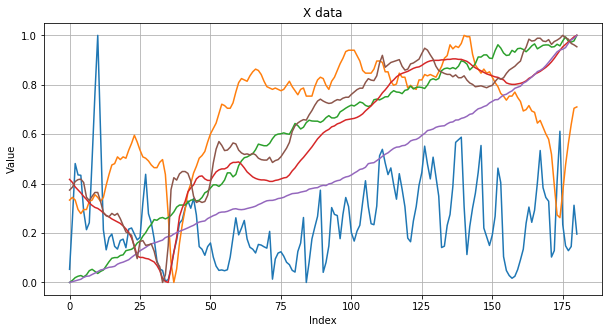

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))  # 그래프 크기 설정
plt.plot(X)  # 데이터를 그래프에 그림
plt.title("X data")  # 그래프 제목 설정
plt.xlabel("Index")  # x축 레이블 설정
plt.ylabel("Value")  # y축 레이블 설정
plt.grid(True)  # 격자 표시
plt.show() 

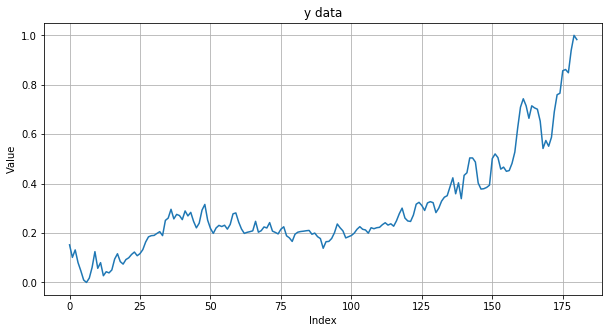

In [38]:
plt.figure(figsize=(10, 5))  # 그래프 크기 설정
plt.plot(y)  # 데이터를 그래프에 그림
plt.title("y data")  # 그래프 제목 설정
plt.xlabel("Index")  # x축 레이블 설정
plt.ylabel("Value")  # y축 레이블 설정
plt.grid(True)  # 격자 표시
plt.show() 

In [7]:
#3차원으로 구성
X_train_tensors = Variable(torch.Tensor(X_train))
X_test_tensors = Variable(torch.Tensor(X_test))

y_train_tensors = Variable(torch.Tensor(y_train))
y_test_tensors = Variable(torch.Tensor(y_test))

X_train_tensors_final = torch.reshape(X_train_tensors, (X_train_tensors.shape[0], 1, X_train_tensors.shape[1]))
X_test_tensors_final = torch.reshape(X_test_tensors, (X_test_tensors.shape[0], 1, X_test_tensors.shape[1])) 

print("Training Shape", X_train_tensors_final.shape, y_train_tensors.shape)
print("Testing Shape", X_test_tensors_final.shape, y_test_tensors.shape) 

Training Shape torch.Size([100, 1, 7]) torch.Size([100, 1])
Testing Shape torch.Size([81, 1, 7]) torch.Size([81, 1])


In [8]:
class GRU(nn.Module) :
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length) :
        super(GRU, self).__init__()
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        
        self.gru = nn.GRU(input_size=input_size,hidden_size=hidden_size,
                         num_layers=num_layers,batch_first=True)
        self.fc_1 = nn.Linear(hidden_size, 128)
        self.fc = nn.Linear(128, num_classes)
        self.relu = nn.ReLU()
        
    def forward(self, x) :
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))
        output, (hn) = self.gru(x, (h_0))
        hn = hn.view(-1, self.hidden_size)
        out = self.relu(hn)
        out = self.fc_1(out)
        out = self.relu(out)
        out = self.fc(out)
        return out

In [9]:
num_epochs = 1000
learning_rate = 0.0001

input_size=7
hidden_size=2
num_layers=1
num_classes=1

GRU=GRU(num_classes,input_size,hidden_size,num_layers,X_train_tensors_final.shape[1])

loss_function = torch.nn.MSELoss()
optimizer = torch.optim.Adam(GRU.parameters(), lr=learning_rate)

In [11]:
for epoch in range(num_epochs) :
    outputs = GRU.forward(X_train_tensors_final)
    optimizer.zero_grad()
    
    loss = loss_function(outputs, y_train_tensors)
    
    loss.backward()
    
    optimizer.step()
    if epoch % 100 == 0 :
        print(f'Epoch : {epoch}, loss : {loss.item():1.5f}')

Epoch : 0, loss : 0.01035
Epoch : 100, loss : 0.00492
Epoch : 200, loss : 0.00481
Epoch : 300, loss : 0.00470
Epoch : 400, loss : 0.00456
Epoch : 500, loss : 0.00444
Epoch : 600, loss : 0.00433
Epoch : 700, loss : 0.00422
Epoch : 800, loss : 0.00411
Epoch : 900, loss : 0.00399


In [49]:
X = torch.Tensor(X_train_tensors_final)
y = torch.Tensor(y_train_tensors)

# 데이터의 형태 확인
print("X의 형태:", X.shape)
print("y의 형태:", y.shape)

X의 형태: torch.Size([100, 1, 6])
y의 형태: torch.Size([100, 1])


In [51]:
y_train_tensors = y_train_tensors.reshape(-1, 1)
X_train_tensors_final = X_train_tensors_final.reshape(-1, X_train_tensors_final.shape[-1])

X = torch.Tensor(X_train_tensors_final)
y = torch.Tensor(y_train_tensors)

# 데이터의 형태 확인
print("X의 형태:", X.shape)
print("y의 형태:", y.shape)

X의 형태: torch.Size([100, 6])
y의 형태: torch.Size([100, 1])


In [12]:
df_X_ss = ss.transform(X)
df_y_mm = mm.transform(y)

df_X_ss = Variable(torch.Tensor(df_X_ss))
df_y_mm = Variable(torch.Tensor(df_y_mm))

df_X_ss = torch.reshape(df_X_ss, (df_X_ss.shape[0], 1, df_X_ss.shape[1]))

In [ ]:
plt.savefig('서울_GRU.png', dpi=200)

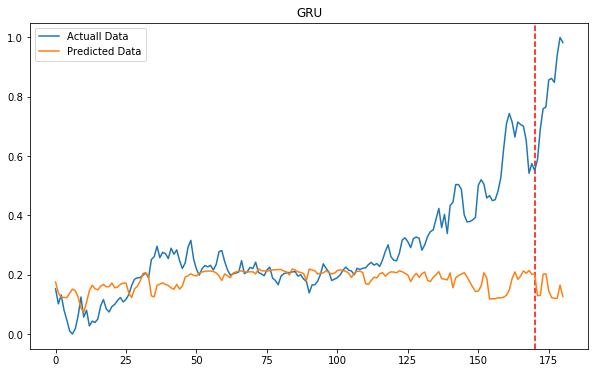

In [21]:
train_predict = GRU(df_X_ss)
data_predict = train_predict.data.numpy()
dataY_plot = df_y_mm.data.numpy()

data_predict = mm.inverse_transform(data_predict)
dataY_plot = mm.inverse_transform(dataY_plot)
plt.figure(figsize=(10, 6))
plt.axvline(x=170, c='r', linestyle='--')

plt.plot(dataY_plot, label='Actuall Data') #actual plot
plt.plot(data_predict, label='Predicted Data') #predicted plot
plt.title('GRU')
plt.legend()
plt.show()

In [22]:
y_test=dataY_plot
y_pred=data_predict


In [24]:
y_pred

array([[0.17543352],
       [0.13833457],
       [0.12413102],
       [0.12322553],
       [0.12295504],
       [0.13759208],
       [0.15125875],
       [0.14611122],
       [0.12467346],
       [0.08763512],
       [0.07354438],
       [0.10702803],
       [0.14600223],
       [0.16451249],
       [0.15242344],
       [0.14892645],
       [0.16147909],
       [0.16714439],
       [0.15888584],
       [0.15992606],
       [0.17195788],
       [0.15566391],
       [0.15820754],
       [0.1674551 ],
       [0.17141926],
       [0.17148313],
       [0.1376685 ],
       [0.12322778],
       [0.15178755],
       [0.16073674],
       [0.17787859],
       [0.20398995],
       [0.20683047],
       [0.19359902],
       [0.12859643],
       [0.12496794],
       [0.16402048],
       [0.16794464],
       [0.17224854],
       [0.16704234],
       [0.16371477],
       [0.15528816],
       [0.15097168],
       [0.16740906],
       [0.15121073],
       [0.16187117],
       [0.19179833],
       [0.196

In [25]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, \
    mean_squared_log_error, r2_score

def confirm_result(y_test, y_pred):
    MAE = mean_absolute_error(y_test, y_pred)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    MSLE = mean_squared_log_error(y_test, y_pred)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, y_pred))
    R2 = r2_score(y_test, y_pred)
    
    pd.options.display.float_format = '{:.5f}'.format
    Result = pd.DataFrame(data=[MAE, RMSE, MSLE, RMSLE, R2],
                         index=['MAE', 'RMSE', 'MSLE', 'RMSLE', 'R2'],
                         columns=['Results'])
    return Result

# 예시 데이터 (y_test와 y_pred는 NumPy 배열)


result_df = confirm_result(y_test, y_pred)
print(result_df)


       Results
MAE    0.14329
RMSE   0.23635
MSLE   0.02848
RMSLE  0.16876
R2    -0.41683
